In [32]:
# import library
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## data cleaning/pre-processing

In [19]:
# Time processing
df = pd.read_csv("finall_data.csv")
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [20]:
df.dropna(subset=['body'],inplace=True)
start_date = pd.to_datetime('01/01/2020')
end_date = pd.to_datetime('31/12/2023')
filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

C:\Users\86157\AppData\Local\Temp\ipykernel_31580\2168400970.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  end_date = pd.to_datetime('31/12/2023')


## Sentiment Analysis

In [21]:
# 01/2020 to 12/2023
# Create an emotion Analyzer
sia = SentimentIntensityAnalyzer()

sentiment_scores = []
for each in filtered_df['body'].values.tolist():
    # Conduct sentiment analysis
    sentiment_score = sia.polarity_scores(each)['compound']
    sentiment_scores.append(sentiment_score)

In [23]:
filtered_df['sentiment'] = sentiment_scores

C:\Users\86157\AppData\Local\Temp\ipykernel_31580\4022261341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['sentiment'] = sentiment_scores


In [24]:
filtered_df.head()

,Unnamed: 0,keyword,url,from,headline,body,body_word_count,date,year,month,sentiment
3278,1513,Environmental crisis,https://www.foxnews.com/tech/amazon-threatens-...,fox,Amazon threatens to fire employees who critici...,has warned two employees who publicly critici...,404,2020-01-02,2020,1,-0.9921
3279,7400,Paris Agreement,https://www.foxnews.com/media/maxine-waters-ru...,fox,Maxine Waters' phone call with 'Greta Thunberg...,"Rep. \n, D-Calif., appeared to have been trick...",612,2020-01-03,2020,1,0.9707
3280,1499,Environmental crisis,https://www.foxnews.com/science/australias-bus...,fox,Australia's bushfire crisis seen from space,The raging bushfires that have destroyed milli...,522,2020-01-03,2020,1,-0.9978
3281,3750,Renewable energy,https://www.foxnews.com/opinion/daniel-turner-...,fox,Daniel Turner: US can withstand Iranian attack...,The threat Friday by a top Iranian military le...,953,2020-01-04,2020,1,0.9756
3282,5319,Extreme weather,https://www.foxnews.com/world/australia-wildfi...,fox,Australia wildfires developing their own 'dang...,The \n that are ravaging parts of \n are \n un...,858,2020-01-05,2020,1,-0.9981


In [28]:
# sentiment score visualizations, 05/2020 to 05/2021
start_date = pd.to_datetime('5/01/2020')
end_date = pd.to_datetime('5/31/2021')
df1 = filtered_df[(filtered_df['date'] >= start_date) & (filtered_df['date'] <= end_date)]
df1['time'] = df1['year'].astype('str') + '-' + df1['month'].astype('str')

In [34]:
data = []
first_values = df1['time'].drop_duplicates(keep='first')
for e in first_values:
    data.append(df1[df1['time']==e]['sentiment'].values.tolist())

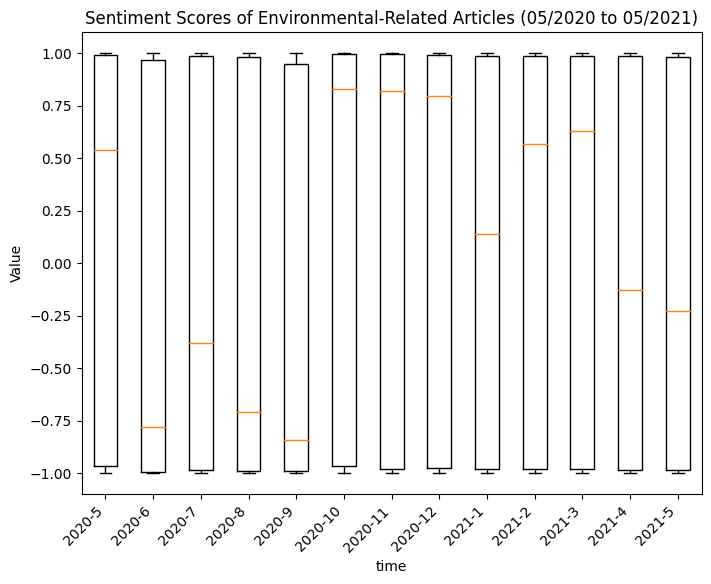

In [36]:
# Use Matplotlib to draw a box diagram
plt.figure(figsize=(8, 6))
plt.boxplot(data,
            labels=first_values)
plt.title('Sentiment Scores of Environmental-Related Articles (05/2020 to 05/2021)')
plt.xlabel('time')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.savefig("data/Sentiment/05-2020 to 05-2021.png",dpi=300)
plt.close()

In [37]:
# sentiment score visualizations, 05/2021 to 05/2022
start_date = pd.to_datetime('5/01/2021')
end_date = pd.to_datetime('5/31/2022')
df1 = filtered_df[(filtered_df['date'] >= start_date) & (filtered_df['date'] <= end_date)]
df1['time'] = df1['year'].astype('str') + '-' + df1['month'].astype('str')
data = []
first_values = df1['time'].drop_duplicates(keep='first')
for e in first_values:
    data.append(df1[df1['time']==e]['sentiment'].values.tolist())
plt.figure(figsize=(8, 6))
plt.boxplot(data,
            labels=first_values)
plt.title('Sentiment Scores of Environmental-Related Articles (05/2021 to 05/2022)')
plt.xlabel('time')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.savefig("data/Sentiment/05-2021 to 05-2022.png",dpi=300)
plt.close()

C:\Users\86157\AppData\Local\Temp\ipykernel_31580\2911817351.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['time'] = df1['year'].astype('str') + '-' + df1['month'].astype('str')


In [38]:
# sentiment score visualizations, 05/2022 to 05/2023
start_date = pd.to_datetime('5/01/2022')
end_date = pd.to_datetime('5/31/2023')
df1 = filtered_df[(filtered_df['date'] >= start_date) & (filtered_df['date'] <= end_date)]
df1['time'] = df1['year'].astype('str') + '-' + df1['month'].astype('str')
data = []
first_values = df1['time'].drop_duplicates(keep='first')
for e in first_values:
    data.append(df1[df1['time']==e]['sentiment'].values.tolist())
plt.figure(figsize=(8, 6))
plt.boxplot(data,
            labels=first_values)
plt.title('Sentiment Scores of Environmental-Related Articles (05/2022 to 05/2023)')
plt.xlabel('time')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.savefig("data/Sentiment/05-2022 to 05-2023.png",dpi=300)
plt.close()

C:\Users\86157\AppData\Local\Temp\ipykernel_31580\583589266.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['time'] = df1['year'].astype('str') + '-' + df1['month'].astype('str')


In [39]:
# sentiment score visualizations, 05/2020 to 12/2023
start_date = pd.to_datetime('5/01/2020')
end_date = pd.to_datetime('12/31/2023')
df1 = filtered_df[(filtered_df['date'] >= start_date) & (filtered_df['date'] <= end_date)]
df1['time'] = df1['year'].astype('str') + '-' + df1['month'].astype('str')
data = []
first_values = df1['time'].drop_duplicates(keep='first')
for e in first_values:
    data.append(df1[df1['time']==e]['sentiment'].values.tolist())
plt.figure(figsize=(18, 6))
plt.boxplot(data,
            labels=first_values)
plt.title('Sentiment Scores of Environmental-Related Articles (05/2020 to 12/2023)')
plt.xlabel('time')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.savefig("data/Sentiment/05-2020 to 12-2023.png",dpi=300)
plt.close()

C:\Users\86157\AppData\Local\Temp\ipykernel_31580\204697706.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['time'] = df1['year'].astype('str') + '-' + df1['month'].astype('str')


### anova

In [41]:
from scipy.stats import f_oneway
# ANOVA 
# 9/22/2020 to 10/22/2020 & 10/22/2020 to 11/21/2020 & 11/21/2020 to 12/21/2020 (COP26 postpone)
# Convert string dates to datetime type
start_date = pd.to_datetime('9/22/2020')
end_date = pd.to_datetime('10/22/2020')
# Filter the data based on date range
filtered_df1 = filtered_df[(filtered_df['date'] >= start_date) & (filtered_df['date'] <= end_date)]

start_date = pd.to_datetime('10/22/2020')
end_date = pd.to_datetime('11/21/2020')
filtered_df2 = filtered_df[(filtered_df['date'] >= start_date) & (filtered_df['date'] <= end_date)]

start_date = pd.to_datetime('11/21/2020')
end_date = pd.to_datetime('12/21/2020')
filtered_df3 = filtered_df[(filtered_df['date'] >= start_date) & (filtered_df['date'] <= end_date)]

# Count the data for each date and sort by date
date1 = filtered_df1['sentiment'].values.tolist()
date2 = filtered_df2['sentiment'].values.tolist()
date3 = filtered_df3['sentiment'].values.tolist()

# Perform one-way analysis of variance (ANOVA)
f_statistic, p_value = f_oneway(date1, date2, date3)

# Output the results of the ANOVA
print("Results of one-way analysis of variance:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

Results of one-way analysis of variance:
F-statistic: 2.1731596188567024
p-value: 0.11404906317931028


In [43]:
# ANOVA 
# 9/22/2021 to 10/22/2021 & 10/22/2021 to 11/21/2021 & 11/21/2021 to 12/21/2021（COP26 10/31/2021 – 11/12/2021）
start_date = pd.to_datetime('9/22/2021')
end_date = pd.to_datetime('10/22/2021')
# Filter the data based on date range
filtered_df1 = filtered_df[(filtered_df['date'] >= start_date) & (filtered_df['date'] <= end_date)]

start_date = pd.to_datetime('10/22/2021')
end_date = pd.to_datetime('11/21/2021')
filtered_df2 = filtered_df[(filtered_df['date'] >= start_date) & (filtered_df['date'] <= end_date)]

start_date = pd.to_datetime('11/21/2021')
end_date = pd.to_datetime('12/21/2021')
filtered_df3 = filtered_df[(filtered_df['date'] >= start_date) & (filtered_df['date'] <= end_date)]

# Count the data for each date and sort by date
date1 = filtered_df1['sentiment'].values.tolist()
date2 = filtered_df2['sentiment'].values.tolist()
date3 = filtered_df3['sentiment'].values.tolist()

# Perform one-way analysis of variance (ANOVA)
f_statistic, p_value = f_oneway(date1, date2, date3)

# Output the results of the ANOVA
print("Results of one-way analysis of variance:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

Results of one-way analysis of variance:
F-statistic: 5.305429211849643
p-value: 0.005015178815939185


In [44]:
# ANOVA 
# 9/27/2022 to 10/27/2022 & 10/27/2022 to 11/27/2022 & 11/27/2022 to 12/27/2022 （COP27 11/6/2022 – 11/18/2022）
start_date = pd.to_datetime('9/27/2022')
end_date = pd.to_datetime('10/27/2022')
# Filter the data based on date range
filtered_df1 = filtered_df[(filtered_df['date'] >= start_date) & (filtered_df['date'] <= end_date)]

start_date = pd.to_datetime('10/27/2022')
end_date = pd.to_datetime('11/27/2022')
filtered_df2 = filtered_df[(filtered_df['date'] >= start_date) & (filtered_df['date'] <= end_date)]

start_date = pd.to_datetime('11/27/2022')
end_date = pd.to_datetime('12/27/2022')
filtered_df3 = filtered_df[(filtered_df['date'] >= start_date) & (filtered_df['date'] <= end_date)]

# Count the data for each date and sort by date
date1 = filtered_df1['sentiment'].values.tolist()
date2 = filtered_df2['sentiment'].values.tolist()
date3 = filtered_df3['sentiment'].values.tolist()

# Perform one-way analysis of variance (ANOVA)
f_statistic, p_value = f_oneway(date1, date2, date3)

# Output the results of the ANOVA
print("Results of one-way analysis of variance:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

Results of one-way analysis of variance:
F-statistic: 1.450872538810853
p-value: 0.23454755919020637


In [45]:
# ANOVA 
# 9/22/2023 to 10/22/2023 & 10/22/2023 to 11/21/2023 & 11/21/2023 to 12/21/2023 （COP28  11/30/2023 – 12/12/2023）
start_date = pd.to_datetime('9/22/2023')
end_date = pd.to_datetime('10/22/2023')
# Filter the data based on date range
filtered_df1 = filtered_df[(filtered_df['date'] >= start_date) & (filtered_df['date'] <= end_date)]

start_date = pd.to_datetime('10/22/2023')
end_date = pd.to_datetime('11/21/2023')
filtered_df2 = filtered_df[(filtered_df['date'] >= start_date) & (filtered_df['date'] <= end_date)]

start_date = pd.to_datetime('11/21/2023')
end_date = pd.to_datetime('12/21/2023')
filtered_df3 = filtered_df[(filtered_df['date'] >= start_date) & (filtered_df['date'] <= end_date)]

# Count the data for each date and sort by date
date1 = filtered_df1['sentiment'].values.tolist()
date2 = filtered_df2['sentiment'].values.tolist()
date3 = filtered_df3['sentiment'].values.tolist()

# Perform one-way analysis of variance (ANOVA)
f_statistic, p_value = f_oneway(date1, date2, date3)

# Output the results of the ANOVA
print("Results of one-way analysis of variance:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

Results of one-way analysis of variance:
F-statistic: 11.863775078727889
p-value: 7.391196551086705e-06


In [46]:
# 10/31/2020 – 11/12/2020 & 10/22/2021 to 11/21/2021 
start_date = pd.to_datetime('10/31/2020')
end_date = pd.to_datetime('11/12/2020')
# Filter the data based on date range
filtered_df1 = filtered_df[(filtered_df['date'] >= start_date) & (filtered_df['date'] <= end_date)]

start_date = pd.to_datetime('10/22/2021')
end_date = pd.to_datetime('11/21/2021')
filtered_df2 = filtered_df[(filtered_df['date'] >= start_date) & (filtered_df['date'] <= end_date)]


# Count the data for each date and sort by date
date1 = filtered_df1['sentiment'].values.tolist()
date2 = filtered_df2['sentiment'].values.tolist()

# Perform one-way analysis of variance (ANOVA)
f_statistic, p_value = f_oneway(date1, date2)

# Output the results of the ANOVA
print("Results of one-way analysis of variance:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

Results of one-way analysis of variance:
F-statistic: 1.2694885030990004
p-value: 0.2600448148261954


In [47]:
# 10/31/2020 – 11/12/2020 & 11/6/2022 – 11/18/2022
start_date = pd.to_datetime('10/31/2020')
end_date = pd.to_datetime('11/12/2020')
# Filter the data based on date range
filtered_df1 = filtered_df[(filtered_df['date'] >= start_date) & (filtered_df['date'] <= end_date)]

start_date = pd.to_datetime('11/6/2022')
end_date = pd.to_datetime('11/18/2022')
filtered_df2 = filtered_df[(filtered_df['date'] >= start_date) & (filtered_df['date'] <= end_date)]


# Count the data for each date and sort by date
date1 = filtered_df1['sentiment'].values.tolist()
date2 = filtered_df2['sentiment'].values.tolist()

# Perform one-way analysis of variance (ANOVA)
f_statistic, p_value = f_oneway(date1, date2)

# Output the results of the ANOVA
print("Results of one-way analysis of variance:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

Results of one-way analysis of variance:
F-statistic: 1.1128070803151064
p-value: 0.2918056064079676


In [48]:
# 10/31/2020 – 11/12/2020 & 11/30/2023 – 12/12/2023
start_date = pd.to_datetime('10/31/2020')
end_date = pd.to_datetime('11/12/2020')
# Filter the data based on date range
filtered_df1 = filtered_df[(filtered_df['date'] >= start_date) & (filtered_df['date'] <= end_date)]

start_date = pd.to_datetime('11/30/2023')
end_date = pd.to_datetime('12/12/2023')
filtered_df2 = filtered_df[(filtered_df['date'] >= start_date) & (filtered_df['date'] <= end_date)]


# Count the data for each date and sort by date
date1 = filtered_df1['sentiment'].values.tolist()
date2 = filtered_df2['sentiment'].values.tolist()

# Perform one-way analysis of variance (ANOVA)
f_statistic, p_value = f_oneway(date1, date2)

# Output the results of the ANOVA
print("Results of one-way analysis of variance:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

Results of one-way analysis of variance:
F-statistic: 18.86126652656258
p-value: 1.62546565035822e-05
